In [1]:
# import warnings
# warnings.filterwarnings('ignore')
# import json
# import numpy as np
# import pandas as pd
# import random
# from matplotlib import pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud,STOPWORDS
# import missingno as msno

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# from keras.preprocessing import text
# import keras
# from keras.models import Sequential
# from keras.layers import Dense,Embedding,LSTM,Dropout
# from keras.callbacks import ReduceLROnPlateau

# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import nltk
# from nltk import word_tokenize
# from nltk.stem import PorterStemmer

# import torch
# from torch.utils.data import Dataset

# from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
# from transformers import pipeline
# from transformers import DistilBertTokenizerFast
# from transformers import BertForSequenceClassification, BertTokenizerFast
# from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
# from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
# from transformers import TrainingArguments, Trainer

In [2]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    data = list(parse(path))
    df = pd.json_normalize(data, 'questions', ['asin'])
    return df

# Replace 'QA_Beauty.json.gz' with the actual path to your Gzip-compressed JSON file
df = getDF('QA_Beauty.json.gz')

# Display the DataFrame
df

,questionType,askerID,questionTime,questionText,answers,asin
0,open-ended,A3VTSR929E3J0R,"December 26, 2013",May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,B000050FES
1,open-ended,A1LZ5DJ7AJYAXD,"April 26, 2014",Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,B000050FES
2,yes/no,A1ER8W5FAQM6G5,"July 11, 2014","How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,B000050FES
3,open-ended,A1P403R4I7LVPU,"December 20, 2013",How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,B000052YQ2
4,open-ended,A166KM8A5H1Z2O,"February 26, 2014",I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,B000052YQ2
...,...,...,...,...,...,...
32931,yes/no,A164SPHD6JR4L0,"July 2, 2014",is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,B00L5JHZJO
32932,yes/no,A3LMNODD16O8J6,"July 2, 2014",I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...",B00L5JHZJO
32933,yes/no,A13S7ZT69W96HR,"July 2, 2014",is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,B00L5JHZJO
32934,open-ended,A1HHOCBWVDXSE,"July 2, 2014",how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...,B00L5JHZJO


In [3]:
first_row = df.iloc[0]
print(first_row)


questionType                                           open-ended
askerID                                            A3VTSR929E3J0R
questionTime                                    December 26, 2013
questionText    May I request for a manual instruction on this...
answers         [{'answerText': 'Homedics has a complete list ...
asin                                                   B000050FES
Name: 0, dtype: object


In [4]:
df.describe()

,questionType,askerID,questionTime,questionText,answers,asin
count,32936,32936,32936,32936,32936,32936
unique,2,25236,1062,27048,28217,5857
top,open-ended,A2QE9FT13SXK92,"April 16, 2014",What are the ingredients?,"[{'answerText': 'NL L72.', 'answererID': 'A2T9...",B000XJ0PG2
freq,28380,45,112,52,44,10


In [5]:
#Distribution of question type
df['questionType'].value_counts()

open-ended    28380
yes/no         4556
Name: questionType, dtype: int64

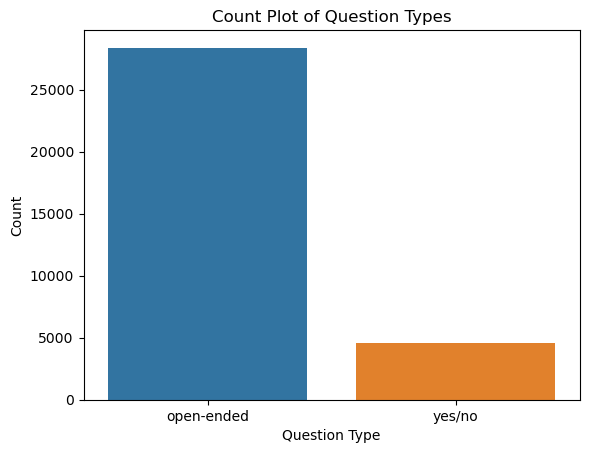

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.countplot(x='questionType', data=df)
plt.title('Count Plot of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.show()


In [7]:
df['asin'].value_counts()

B000XJ0PG2    10
B00B1M0XCG    10
B00H1M8QZG    10
B00BMVNMTM    10
B001TJXI6Y    10
              ..
B006YEDCAG     1
B004A6YI4Y     1
B009K2V3P0     1
B00FG0VHGU     1
B00ABV3RHQ     1
Name: asin, Length: 5857, dtype: int64

In [8]:
unique_values = df['asin'].unique()
print(unique_values)

['B000050FES' 'B000052YQ2' 'B0000532I0' ... 'B00JFJR4OW' 'B00JOSEHTO'
 'B00L5JHZJO']


In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


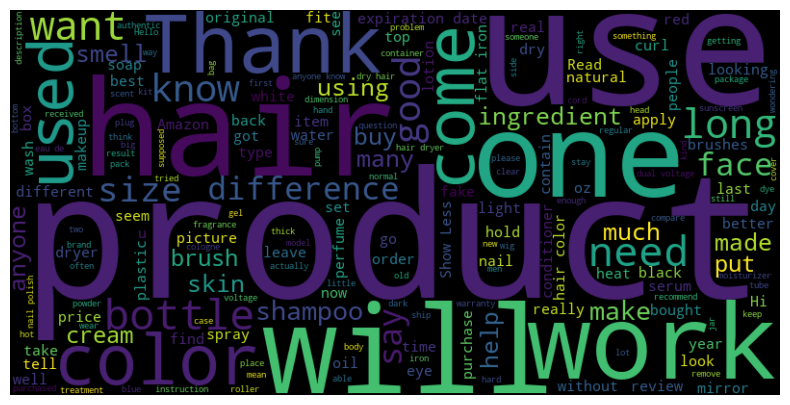

In [10]:
# Example: Word cloud for 'questionText'
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['questionText'])
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
df.columns

Index(['questionType', 'askerID', 'questionTime', 'questionText', 'answers',
       'asin'],
      dtype='object')

In [12]:
# To find distribution of askerID to see the frequent question askers
df['askerID'].value_counts()

A2QE9FT13SXK92    45
AC1EHIHZXHO5Z     44
AWFDCWYU4FYQH     44
AURSN3VOCU689     44
A1U5ATWFOR4APM    44
                  ..
A1Z8H70NBK6K5Z     1
A33IRFJTVB4DSM     1
A1L0GP3TFKYV0      1
A2Q409B38XKL9G     1
A1ZJ90GJNNH2EK     1
Name: askerID, Length: 25236, dtype: int64

In [13]:
#import pandas as pd

# Assuming df is your DataFrame with the 'questionTime' column
df['questionTime'] = pd.to_datetime(df['questionTime'], format='%B %d, %Y', errors='coerce')

# Drop rows with NaT (Not a Time) values after conversion
df = df.dropna(subset=['questionTime'])

# Extract relevant temporal features
df['year'] = df['questionTime'].dt.year
df['month'] = df['questionTime'].dt.month
df['day_of_week'] = df['questionTime'].dt.day_of_week

# Display the DataFrame
print(df)


      questionType         askerID questionTime  \
0       open-ended  A3VTSR929E3J0R   2013-12-26   
1       open-ended  A1LZ5DJ7AJYAXD   2014-04-26   
2           yes/no  A1ER8W5FAQM6G5   2014-07-11   
3       open-ended  A1P403R4I7LVPU   2013-12-20   
4       open-ended  A166KM8A5H1Z2O   2014-02-26   
...            ...             ...          ...   
32931       yes/no  A164SPHD6JR4L0   2014-07-02   
32932       yes/no  A3LMNODD16O8J6   2014-07-02   
32933       yes/no  A13S7ZT69W96HR   2014-07-02   
32934   open-ended   A1HHOCBWVDXSE   2014-07-02   
32935   open-ended  A1ZJ90GJNNH2EK   2014-07-02   

                                            questionText  \
0      May I request for a manual instruction on this...   
1      Having problems with the heater melting the wa...   
2      How much wax (in pounds, for instance) does it...   
3          How to know the expired date of this product?   
4      I am not in the sun as I work inside. I am new...   
...                        

C:\Users\Faith\AppData\Local\Temp\ipykernel_17164\1690566529.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['questionTime'].dt.year
C:\Users\Faith\AppData\Local\Temp\ipykernel_17164\1690566529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['questionTime'].dt.month
C:\Users\Faith\AppData\Local\Temp\ipykernel_17164\1690566529.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [14]:
df

,questionType,askerID,questionTime,questionText,answers,asin,year,month,day_of_week
0,open-ended,A3VTSR929E3J0R,2013-12-26,May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,B000050FES,2013,12,3
1,open-ended,A1LZ5DJ7AJYAXD,2014-04-26,Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,B000050FES,2014,4,5
2,yes/no,A1ER8W5FAQM6G5,2014-07-11,"How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,B000050FES,2014,7,4
3,open-ended,A1P403R4I7LVPU,2013-12-20,How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,B000052YQ2,2013,12,4
4,open-ended,A166KM8A5H1Z2O,2014-02-26,I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,B000052YQ2,2014,2,2
...,...,...,...,...,...,...,...,...,...
32931,yes/no,A164SPHD6JR4L0,2014-07-02,is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,B00L5JHZJO,2014,7,2
32932,yes/no,A3LMNODD16O8J6,2014-07-02,I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...",B00L5JHZJO,2014,7,2
32933,yes/no,A13S7ZT69W96HR,2014-07-02,is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,B00L5JHZJO,2014,7,2
32934,open-ended,A1HHOCBWVDXSE,2014-07-02,how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...,B00L5JHZJO,2014,7,2


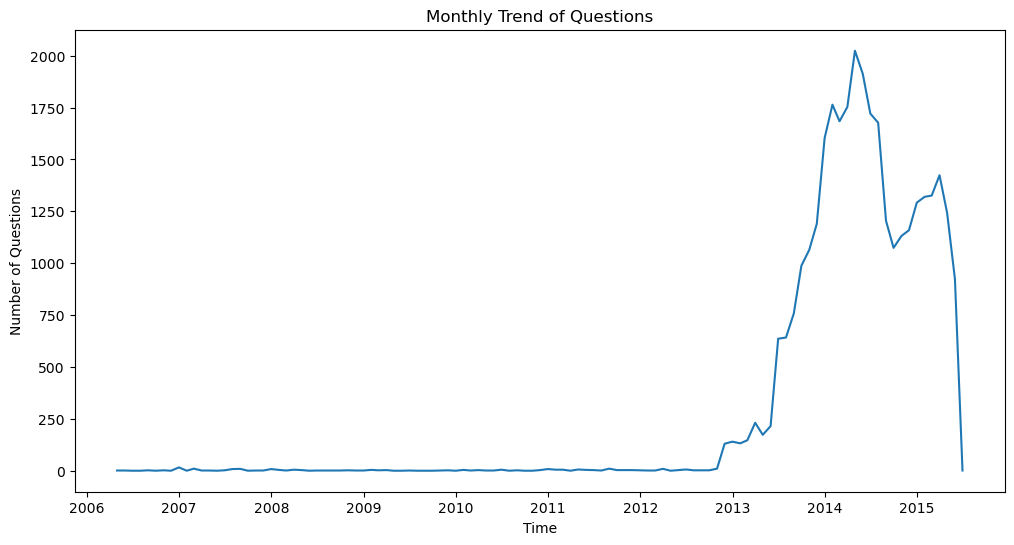

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the 'questionTime' column already converted to datetime
# If not, follow the previous response to convert it.

# Set the 'questionTime' column as the index
df.set_index('questionTime', inplace=True)

# Resample the data to a monthly frequency
monthly_counts = df.resample('M').size()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Monthly Trend of Questions')
plt.xlabel('Time')
plt.ylabel('Number of Questions')
plt.show()


In [16]:
# To see the sample of questions

# Assuming df is your DataFrame
# If 'questionText' contains strings, you can calculate the length
df['questionText_length'] = df['questionText'].apply(len)

# Display the length and content of questions
print("Length of Questions:")
print(df[['questionText', 'questionText_length']].head())

# Explore the content of questions
print("\nSample Questions:")
for index, question in enumerate(df['questionText'].head()):
    print(f"{index + 1}. {question}")


Length of Questions:
                                                   questionText  \
questionTime                                                      
2013-12-26    May I request for a manual instruction on this...   
2014-04-26    Having problems with the heater melting the wa...   
2014-07-11    How much wax (in pounds, for instance) does it...   
2013-12-20        How to know the expired date of this product?   
2014-02-26    I am not in the sun as I work inside. I am new...   

              questionText_length  
questionTime                       
2013-12-26                     55  
2014-04-26                     67  
2014-07-11                     72  
2013-12-20                     45  
2014-02-26                     96  

Sample Questions:
1. May I request for a manual instruction on this product?
2. Having problems with the heater melting the wax.  What should I do?
3. How much wax (in pounds, for instance) does it take to fill this heater?
4. How to know the expired date 

C:\Users\Faith\AppData\Local\Temp\ipykernel_17164\129580716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['questionText_length'] = df['questionText'].apply(len)


In [17]:
df.columns

Index(['questionType', 'askerID', 'questionText', 'answers', 'asin', 'year',
       'month', 'day_of_week', 'questionText_length'],
      dtype='object')

Distribution of Questions and Answers for Each Product:
            question_count  answer_count
asin                                    
602260074X               5            15
7800558258               3            10
9788071813               3            11
B00004TUBL               9            51
B00004TUBV               6            22
...                    ...           ...
B00KCTER3U               5            15
B00KEGG6S0               4            12
B00KYWMYEE               9            32
B00L5DI5K8               6            20
B00L5JHZJO               8            18

[5856 rows x 2 columns]


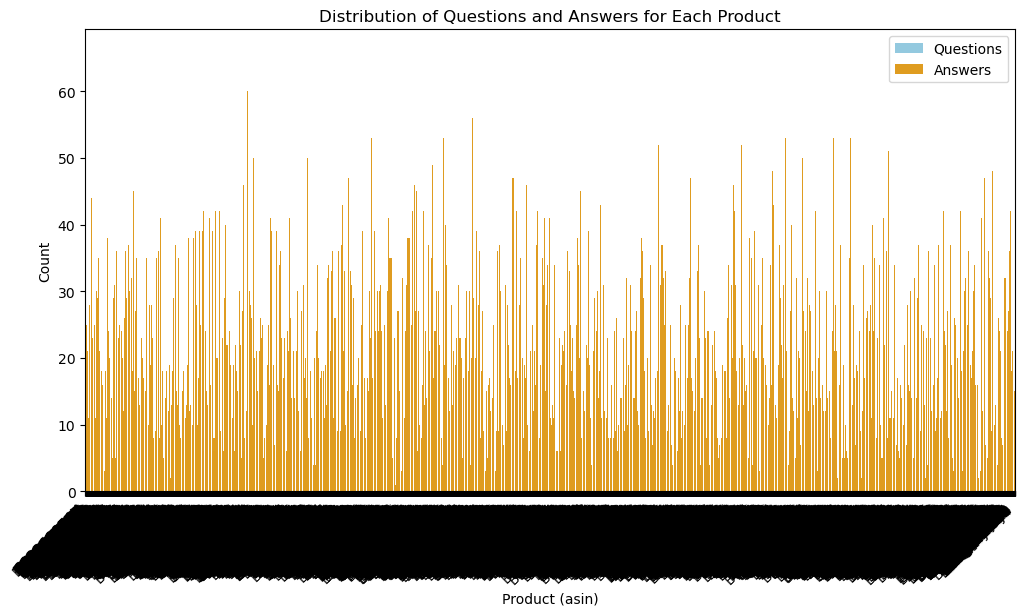

In [18]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Assuming df is your DataFrame

# Count the number of questions and answers for each product ('asin')
product_distribution = df.groupby('asin').agg({'questionText': 'size', 'answers': lambda x: x.apply(len).sum()})

# Rename the columns for clarity
product_distribution = product_distribution.rename(columns={'questionText': 'question_count', 'answers': 'answer_count'})

# Display the distribution DataFrame
print("Distribution of Questions and Answers for Each Product:")
print(product_distribution)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=product_distribution.index, y='question_count', data=product_distribution, color='skyblue', label='Questions')
sns.barplot(x=product_distribution.index, y='answer_count', data=product_distribution, color='orange', label='Answers')
plt.xlabel('Product (asin)')
plt.ylabel('Count')
plt.title('Distribution of Questions and Answers for Each Product')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


In [19]:
# import pandas as pd

# Assuming df is your DataFrame

# Count the number of questions and answers for each product ('asin')
product_distribution = df.groupby('asin').agg({'questionText': 'size', 'answers': lambda x: x.apply(len).sum()})

# Rename the columns for clarity
product_distribution = product_distribution.rename(columns={'questionText': 'question_count', 'answers': 'answer_count'})

# Identify popular products based on questions
popular_products_questions = product_distribution.sort_values(by='question_count', ascending=False)

# Identify popular products based on answers
popular_products_answers = product_distribution.sort_values(by='answer_count', ascending=False)

# Display the popular products based on questions and answers
print("Popular Products Based on Questions:")
print(popular_products_questions)

print("\nPopular Products Based on Answers:")
print(popular_products_answers)


Popular Products Based on Questions:
            question_count  answer_count
asin                                    
B000G666HE              10            40
B00772SCHM              10            29
B0007DHMDI              10            36
B000C21050              10            40
B005BF1M10              10            43
...                    ...           ...
B0009JDUAO               1             3
B00DTIBY5K               1             5
B004PH2V7E               1             2
B000980PK8               1             2
B001CZJWXS               1             2

[5856 rows x 2 columns]

Popular Products Based on Answers:
            question_count  answer_count
asin                                    
B001MA0QY2               9            66
B007WFZ0XI              10            61
B000R830IE              10            60
B007ROCY2O              10            60
B00H1M8QZG              10            59
...                    ...           ...
B000FELJ7Y               1             2


In [20]:
df.columns

Index(['questionType', 'askerID', 'questionText', 'answers', 'asin', 'year',
       'month', 'day_of_week', 'questionText_length'],
      dtype='object')

In [21]:
df

,questionType,askerID,questionText,answers,asin,year,month,day_of_week,questionText_length
questionTime,,,,,,,,,
2013-12-26,open-ended,A3VTSR929E3J0R,May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,B000050FES,2013,12,3,55
2014-04-26,open-ended,A1LZ5DJ7AJYAXD,Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,B000050FES,2014,4,5,67
2014-07-11,yes/no,A1ER8W5FAQM6G5,"How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,B000050FES,2014,7,4,72
2013-12-20,open-ended,A1P403R4I7LVPU,How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,B000052YQ2,2013,12,4,45
2014-02-26,open-ended,A166KM8A5H1Z2O,I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,B000052YQ2,2014,2,2,96
...,...,...,...,...,...,...,...,...,...
2014-07-02,yes/no,A164SPHD6JR4L0,is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,B00L5JHZJO,2014,7,2,37
2014-07-02,yes/no,A3LMNODD16O8J6,I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...",B00L5JHZJO,2014,7,2,88
2014-07-02,yes/no,A13S7ZT69W96HR,is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,B00L5JHZJO,2014,7,2,27


In [22]:
# Assuming your existing DataFrame is named 'original_df'
#original_df = ...

# Create a new DataFrame with only 'questionText','answers' and 'questionType'
new_df = df[['questionText', 'answers','questionType']].copy()

# Display the new DataFrame
print(new_df.head())


                                                   questionText  \
questionTime                                                      
2013-12-26    May I request for a manual instruction on this...   
2014-04-26    Having problems with the heater melting the wa...   
2014-07-11    How much wax (in pounds, for instance) does it...   
2013-12-20        How to know the expired date of this product?   
2014-02-26    I am not in the sun as I work inside. I am new...   

                                                        answers questionType  
questionTime                                                                  
2013-12-26    [{'answerText': 'Homedics has a complete list ...   open-ended  
2014-04-26    [{'answerText': 'I leave the unit on all the t...   open-ended  
2014-07-11    [{'answerText': 'It came with the proper amoun...       yes/no  
2013-12-20    [{'answerText': 'The expiration date is on the...   open-ended  
2014-02-26    [{'answerText': 'This product is awesome. 

In [23]:
# Assuming your DataFrame is named 'original_df'
#original_df = ...

# Create a new DataFrame with only 'questionText' and 'answers'
new_df = df[['questionType','questionText', 'answers']].copy()

# Reset the index if needed
new_df = new_df.reset_index()

# Display the new DataFrame
print(new_df.head())


  questionTime questionType  \
0   2013-12-26   open-ended   
1   2014-04-26   open-ended   
2   2014-07-11       yes/no   
3   2013-12-20   open-ended   
4   2014-02-26   open-ended   

                                        questionText  \
0  May I request for a manual instruction on this...   
1  Having problems with the heater melting the wa...   
2  How much wax (in pounds, for instance) does it...   
3      How to know the expired date of this product?   
4  I am not in the sun as I work inside. I am new...   

                                             answers  
0  [{'answerText': 'Homedics has a complete list ...  
1  [{'answerText': 'I leave the unit on all the t...  
2  [{'answerText': 'It came with the proper amoun...  
3  [{'answerText': 'The expiration date is on the...  
4  [{'answerText': 'This product is awesome. I do...  


In [24]:
df1 = new_df.drop(columns=['questionTime'])


In [25]:
df1

,questionType,questionText,answers
0,open-ended,May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...
1,open-ended,Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...
2,yes/no,"How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...
3,open-ended,How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...
4,open-ended,I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...
...,...,...,...
32885,yes/no,is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...
32886,yes/no,I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ..."
32887,yes/no,is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...
32888,open-ended,how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...


In [26]:
# Assuming df is your DataFrame with the 'answers' column
df1['answerText'] = df1['answers'].apply(lambda x: x[0]['answerText'] if x else None)

# Drop the 'answers' column
df1 = df1.drop(columns=['answers'])


In [27]:
df1

,questionType,questionText,answerText
0,open-ended,May I request for a manual instruction on this...,Homedics has a complete list of instruction ma...
1,open-ended,Having problems with the heater melting the wa...,I leave the unit on all the time so it is alwa...
2,yes/no,"How much wax (in pounds, for instance) does it...","It came with the proper amount of wax, but thi..."
3,open-ended,How to know the expired date of this product?,The expiration date is on the bottom of the pl...
4,open-ended,I am not in the sun as I work inside. I am new...,This product is awesome. I dont spend a lot of...
...,...,...,...
32885,yes/no,is Argan Oil Pure 100% good for Skin?,I really like it. It is a non greasy moisturi...
32886,yes/no,I find myself with rough cuticles right around...,"Yes, you can. In the evening before you go to ..."
32887,yes/no,is it good for nail beauty?,I would say it's good for cuticles. I can't s...
32888,open-ended,how can i use it for Topical Use on Dry Hair?,"A little goes a long way! A drop or two, depe..."


In [28]:
df1['questionText'].loc[5]

'can i put this on a toddler skin?'

In [29]:
df1['answerText'].loc[5]

"You could put it on a toddler's skin.. but not below 6 months.  It's for sensitive skin and SPF 15 Sunscreen.  My little 5 yr old uses it, and it's fine.  On the bottle, says vitamin E and aloe. Hope it helps ;)"

In [30]:
df1.columns

Index(['questionType', 'questionText', 'answerText'], dtype='object')

In [31]:
df.columns

Index(['questionType', 'askerID', 'questionText', 'answers', 'asin', 'year',
       'month', 'day_of_week', 'questionText_length'],
      dtype='object')

In [32]:
df.answers

questionTime
2013-12-26    [{'answerText': 'Homedics has a complete list ...
2014-04-26    [{'answerText': 'I leave the unit on all the t...
2014-07-11    [{'answerText': 'It came with the proper amoun...
2013-12-20    [{'answerText': 'The expiration date is on the...
2014-02-26    [{'answerText': 'This product is awesome. I do...
                                    ...                        
2014-07-02    [{'answerText': 'I really like it.  It is a no...
2014-07-02    [{'answerText': 'Yes, you can. In the evening ...
2014-07-02    [{'answerText': 'I would say it's good for cut...
2014-07-02    [{'answerText': 'A little goes a long way!  A ...
2014-07-02    [{'answerText': 'You can use it as a pre-shamp...
Name: answers, Length: 32890, dtype: object

C:\Users\Faith\AppData\Local\Temp\ipykernel_17164\2133632228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_answers'] = df['answers'].apply(lambda x: len(x) if isinstance(x, list) else 0)


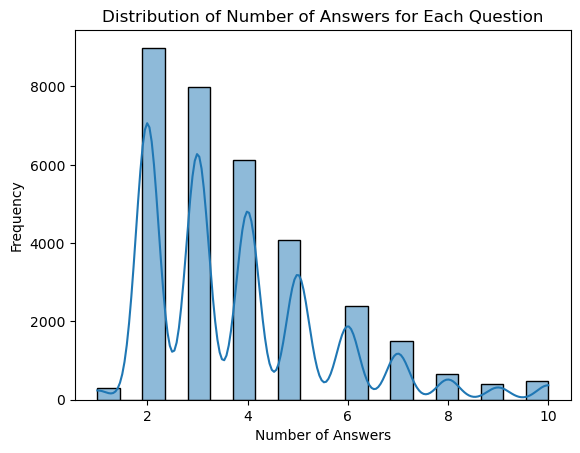

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'answers' is the column containing lists of answers
df['num_answers'] = df['answers'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Plot histogram
sns.histplot(df['num_answers'], bins=20, kde=True)
plt.title('Distribution of Number of Answers for Each Question')
plt.xlabel('Number of Answers')
plt.ylabel('Frequency')
plt.show()


In [34]:
# Assuming 'answers' is the column containing lists of answers
df['num_answers'] = df['answers'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Count occurrences of different numbers of answers
answer_counts = df['num_answers'].value_counts()

# Display the result
print(answer_counts)


2     8990
3     7991
4     6125
5     4067
6     2390
7     1500
8      657
10     470
9      399
1      301
Name: num_answers, dtype: int64


C:\Users\Faith\AppData\Local\Temp\ipykernel_17164\2670510130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_answers'] = df['answers'].apply(lambda x: len(x) if isinstance(x, list) else 0)


In [35]:
df1

,questionType,questionText,answerText
0,open-ended,May I request for a manual instruction on this...,Homedics has a complete list of instruction ma...
1,open-ended,Having problems with the heater melting the wa...,I leave the unit on all the time so it is alwa...
2,yes/no,"How much wax (in pounds, for instance) does it...","It came with the proper amount of wax, but thi..."
3,open-ended,How to know the expired date of this product?,The expiration date is on the bottom of the pl...
4,open-ended,I am not in the sun as I work inside. I am new...,This product is awesome. I dont spend a lot of...
...,...,...,...
32885,yes/no,is Argan Oil Pure 100% good for Skin?,I really like it. It is a non greasy moisturi...
32886,yes/no,I find myself with rough cuticles right around...,"Yes, you can. In the evening before you go to ..."
32887,yes/no,is it good for nail beauty?,I would say it's good for cuticles. I can't s...
32888,open-ended,how can i use it for Topical Use on Dry Hair?,"A little goes a long way! A drop or two, depe..."


## Creating training data

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np



# Assuming df1 is your DataFrame with columns 'questionType', 'questionText', and 'answerText'
# Replace this with your actual DataFrame
# df1 = ...

# Tokenize and lemmatize the text data
lemmatizer = WordNetLemmatizer()
df1['lemmatizedText'] = df1.apply(lambda row: ' '.join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(row['questionText'] + ' ' + row['answerText'])]), axis=1)

# Create a list of question types
question_types = df1['questionType'].unique()

# Create training data for each question type
training_data = []
for question_type in question_types:
    subset_df = df1[df1['questionType'] == question_type]

    # Create bag of words representation for each question
    for index, row in subset_df.iterrows():
        bag = row['lemmatizedText']
        output_row = [0] * len(question_types)
        output_row[np.where(question_types == question_type)[0][0]] = 1
        training_data.append([bag, output_row])

# Separate bags of words and output rows
bags_of_words = [item[0] for item in training_data]
output_rows = [item[1] for item in training_data]

# Convert to numerical data using Count Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(bags_of_words)
numerical_data = X.toarray()

# Separate features (X) and labels (Y)
train_x = numerical_data
train_y = np.array(output_rows)

print("\nTraining data created")


Training data created


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_x, train_y)

# Predict on the test set
rf_predictions = rf_classifier.predict(test_x)

# Calculate test accuracy
rf_test_accuracy = accuracy_score(test_y, rf_predictions)
print(f"\nRandom Forest Test Accuracy: {rf_test_accuracy}")


Random Forest Test Accuracy: 0.8800475059382423


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [ ]:
# Create model
model = Sequential()
model.add(Dense(128, input_shape=(train_x.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_y.shape[1], activation='softmax'))
print("First layer:",model.layers[0].get_weights()[0])

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting the model
hist = model.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1)

# # Saving the model
 model.save('chatbot_model.h5', hist)

print("Model created")

In [36]:
# import pandas as pd
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# import random
# import numpy as np

# # Assuming df1 is your DataFrame with columns 'questionType', 'questionText', and 'answerText'
# # Replace this with your actual DataFrame
# # df1 = ...

# # Combine question and answer text for processing
# texts = df1['questionText'] + ' ' + df1['answerText']

# # Tokenize and lemmatize the words
# lemmatizer = WordNetLemmatizer()
# tokenized_texts = [word_tokenize(text.lower()) for text in texts]
# lemmatized_texts = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in tokenized_texts]

# # Convert the lemmatized texts back to strings
# preprocessed_texts = [' '.join(tokens) for tokens in lemmatized_texts]

# # Vectorize the text data using TF-IDF
# tfidf_vectorizer = TfidfVectorizer()
# X_tfidf = tfidf_vectorizer.fit_transform(preprocessed_texts)

# # Create a list of question types
# question_types = df1['questionType'].unique()

# # Create training data for each question type
# training_data = []
# for question_type in question_types:
#     subset_df = df1[df1['questionType'] == question_type]
    
#     # Create bag of words representation for each question
#     for index, row in subset_df.iterrows():
#         bag = X_tfidf[index].toarray().flatten().tolist()
#         output_row = [0] * len(question_types)
#         output_row[np.where(question_types == question_type)[0][0]] = 1
#         training_data.append([bag, output_row])

# # Shuffle training data and convert to NumPy array
# random.shuffle(training_data)
# training_data = np.array(training_data)

# # Separate features (X) and labels (Y)
# train_x = list(training_data[:, 0])
# train_y = list(training_data[:, 1])

# print("Training data created")


In [37]:
# # create our training data
# training = []
# # create an empty array for our output
# output_empty = [0] * len(classes)
# # training set, bag of words for each sentence
# for doc in documents:
#     # initialize our bag of words
#     bag = []
#     # list of tokenized words
#     pattern_words = doc[0]
#     # convert pattern_words in lower case
#     pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
#     # create bag of words array,if word match found in current pattern then put 1 otherwise 0.[row * colm(263)]
#     for w in words:
#         bag.append(1) if w in pattern_words else bag.append(0)
    
#     # in output array 0 value for each tag ang 1 value for matched tag.[row * colm(8)]
#     output_row = list(output_empty)
#     output_row[classes.index(doc[1])] = 1
    
#     training.append([bag, output_row])
# # shuffle training and turn into np.array
# random.shuffle(training)
# training = np.array(training)
# # create train and test. X - patterns(words), Y - intents(tags)
# train_x = list(training[:,0])
# train_y = list(training[:,1])
# print("Training data created")

In [38]:
# pip install spacy


In [39]:
# !python -m spacy download en_core_web_sm


In [40]:
# df.columns

In [41]:
# import nltk

# # Download the necessary NLTK data
# nltk.download('punkt')


In [42]:
# from nltk import word_tokenize
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# ignore_words=['?', '!', ',', '.']

# def preprocess_pattern(pattern):
#     words = word_tokenize(pattern.lower())
#     stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
#     return " ".join(stemmed_words)  

# df['questionText'] = df['questionText'].apply(preprocess_pattern)


In [43]:
# df['questionText']

In [44]:
# from nltk import word_tokenize
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# ignore_words=['?', '!', ',', '.']

# def preprocess_pattern(pattern):
#     words = word_tokenize(pattern.lower())
#     stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
#     return " ".join(stemmed_words)  

# df1['answerText'] = df1['answerText'].apply(preprocess_pattern)

In [45]:
# df1['answerText']

In [46]:
# # lemmatize, lower each word and remove duplicates
# import pickle
# words=[]
# classes = []
# documents = []
# ignore_words = ['?', '!']
# words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
# words = sorted(list(set(words)))
# # sort classes
# classes = sorted(list(set(classes)))
# # documents = combination between patterns and intents
# print (len(documents), "documents\n", documents, "\n")
# # classes = intents[tag]
# print (len(classes), "classes\n", classes, "\n")
# # words = all words, vocabulary
# print (len(words), "unique lemmatized words\n", words, "\n")
# pickle.dump(words,open('words.pkl','wb'))
# pickle.dump(classes,open('classes.pkl','wb'))

In [47]:
# import nltk
# nltk.download('wordnet')


In [48]:
# import pandas as pd
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# import string

# # Assuming df is your DataFrame
# df1['combined_text'] = df1['questionText'] + ' ' + df1['answerText']

# # Lowercasing
# df1['combined_text'] = df1['combined_text'].str.lower()

# # Tokenization and removing punctuation
# df1['combined_text'] = df1['combined_text'].apply(lambda x: word_tokenize(x.translate(str.maketrans('', '', string.punctuation))))

# # Removing stopwords
# stop_words = set(stopwords.words('english'))
# df1['combined_text'] = df1['combined_text'].apply(lambda x: [word for word in x if word not in stop_words])

# # Lemmatization
# lemmatizer = WordNetLemmatizer()
# df1['combined_text'] = df1['combined_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# # Joining the tokens back into sentences
# df1['processed_text'] = df1['combined_text'].apply(lambda x: ' '.join(x))

# # Drop intermediate columns
# df1 = df1.drop(['combined_text'], axis=1)

# # Display the DataFrame
# print(df1.head())


In [49]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, classification_report

# # Sample data
# # data = [
# #     ("May I request for a manual instruction on this...", "Instruction"),
# #     ("Having problems with the heater melting the wax...", "Heater Issue"),
# #     ("How much wax in pounds for instance does it take?", "Wax Quantity"),
# #     ("How to know the expired date of this product?", "Expiration Date"),
# #     ("I am not in the sun as I work inside...", "Sun Exposure"),
# #     # Add more examples with corresponding intents
# # ]
# data = df1

# # Separate data into features (X) and labels (Y)
# X, Y = zip(*data)

# # Vectorize the text data
# tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# X_tfidf = tfidf_vectorizer.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=42)

# # Train a Multinomial Naive Bayes classifier
# clf = MultinomialNB()
# clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = clf.predict(X_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Example prediction for a new input
# new_input = ["I have a question about product usage."]
# new_input_tfidf = tfidf_vectorizer.transform(new_input)
# predicted_intent = clf.predict(new_input_tfidf)
# print("Predicted Intent:", predicted_intent)


## Modelling

In [50]:
# df